In [210]:
import numpy as np
from keras.models import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns


In [211]:
df=pd.read_csv('IDC Data and Analytics.csv')
df= df[:10000]
df= df[["采集时间", "分配带宽(M)","数据中心ID", "业务ID", "入流量(M)", "出流量(M)"]]
df

,采集时间,分配带宽(M),数据中心ID,业务ID,入流量(M),出流量(M)
0,2022-06-01 00:00:00,20,754669,1710158,0.53,1.02
1,2022-06-01 00:05:00,20,754669,1710158,1.21,1.05
2,2022-06-01 00:10:00,20,754669,1710158,1.19,1.06
3,2022-06-01 00:15:00,20,754669,1710158,1.19,1.25
4,2022-06-01 00:20:00,20,754669,1710158,2.30,1.04
...,...,...,...,...,...,...
9995,2022-06-05 16:55:00,100000,754669,1721644,61369.73,24631.90
9996,2022-06-05 17:00:00,100000,754669,1721644,62124.02,24576.70
9997,2022-06-05 17:05:00,100000,754669,1721644,62273.27,24733.99
9998,2022-06-05 17:10:00,100000,754669,1721644,60933.90,23587.70


In [212]:
df= df.drop(['采集时间'], axis=1)

In [213]:
df=df['出流量(M)']
df

0           1.02
1           1.05
2           1.06
3           1.25
4           1.04
          ...   
9995    24631.90
9996    24576.70
9997    24733.99
9998    23587.70
9999    23881.82
Name: 出流量(M), Length: 10000, dtype: float64

<AxesSubplot: ylabel='出流量(M)'>

/home/envs/ICD/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from current font.
  func(*args, **kwargs)
/home/envs/ICD/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from current font.
  func(*args, **kwargs)
/home/envs/ICD/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  func(*args, **kwargs)
/home/envs/ICD/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/envs/ICD/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/envs/ICD/lib/python3.9/site-packages/IPython/core/pyl

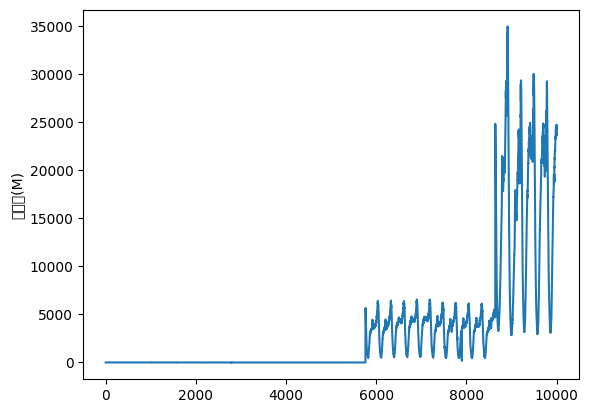

In [214]:
sns.lineplot(df)

In [215]:
ma100= df.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
9995    18709.1534
9996    18877.1742
9997    19043.0597
9998    19195.2983
9999    19346.5577
Name: 出流量(M), Length: 10000, dtype: float64

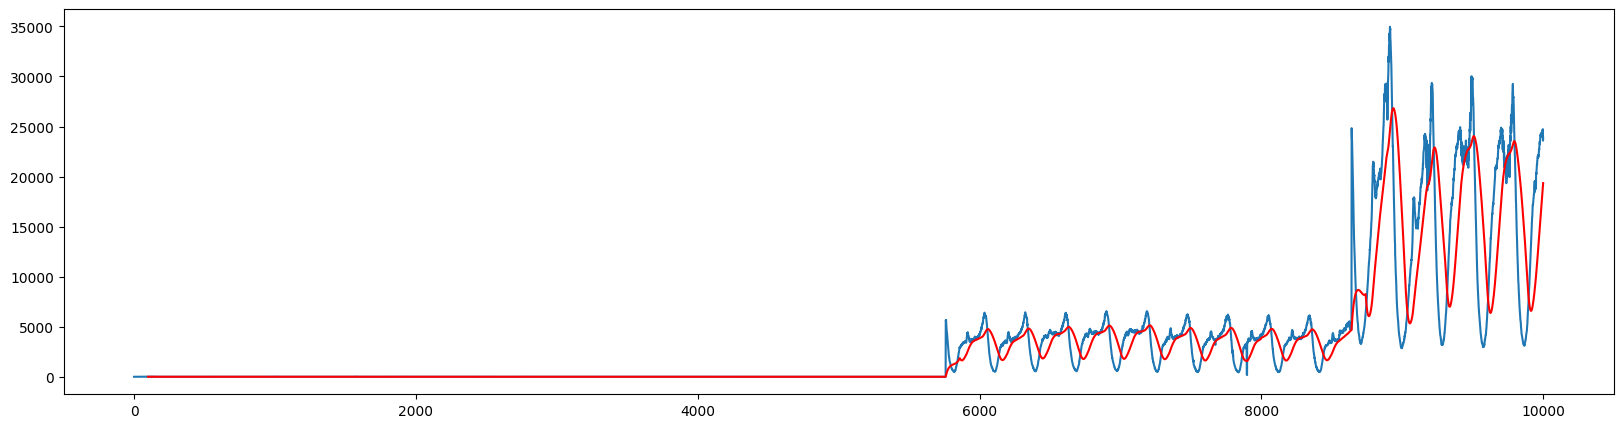

In [216]:
plt.figure(figsize=(20,5))
plt.plot(df)
plt.plot(ma100,'r')

In [217]:
ma200= df.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
9995    13376.16010
9996    13383.58070
9997    13393.42075
9998    13399.89935
9999    13409.89995
Name: 出流量(M), Length: 10000, dtype: float64

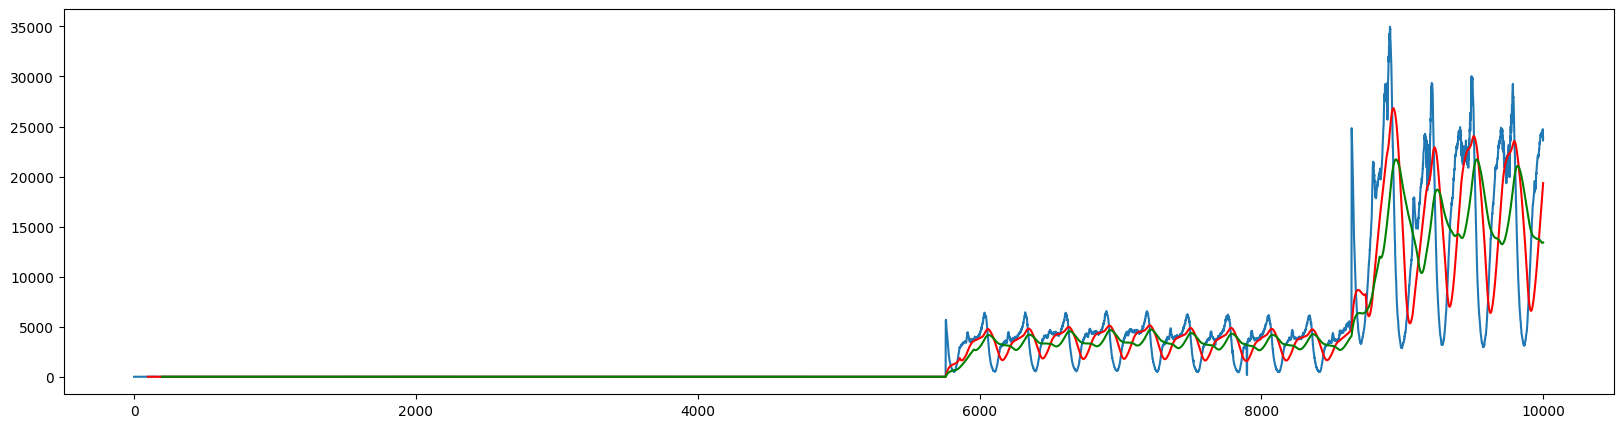

In [218]:
plt.figure(figsize=(20,5))
plt.plot(df)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [219]:
#Splitting to training and testing
data_training=pd.DataFrame(df[0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df[int(len(df)*0.7):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(7000, 1)
(3000, 1)


In [220]:
scaler = MinMaxScaler(feature_range=(0,1))

In [221]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.41713854e-04],
       [1.46285268e-04],
       [1.47809073e-04],
       ...,
       [2.35659472e-01],
       [2.50597332e-01],
       [2.65679952e-01]])

In [222]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
          x_train.append(data_training_array[i-100:i])
          y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [223]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_31 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_32 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [224]:
model.compile(optimizer='adam',loss=['mean_squared_error'])

In [225]:
model.fit(x_train,y_train,epochs = 50,batch_size=64)

Epoch 1/50
108/108 [==============================] - 24s 164ms/step - loss: 0.0034
Epoch 2/50
108/108 [==============================] - 18s 165ms/step - loss: 9.6497e-04
Epoch 3/50
108/108 [==============================] - 18s 165ms/step - loss: 7.7554e-04
Epoch 4/50
108/108 [==============================] - 18s 166ms/step - loss: 6.3634e-04
Epoch 5/50
108/108 [==============================] - 18s 166ms/step - loss: 5.3797e-04
Epoch 6/50
108/108 [==============================] - 18s 164ms/step - loss: 4.9117e-04
Epoch 7/50
108/108 [==============================] - 17s 160ms/step - loss: 4.4275e-04
Epoch 8/50
108/108 [==============================] - 17s 159ms/step - loss: 4.2682e-04
Epoch 9/50
108/108 [==============================] - 17s 160ms/step - loss: 3.5809e-04
Epoch 10/50
108/108 [==============================] - 17s 160ms/step - loss: 3.1858e-04
Epoch 11/50
108/108 [==============================] - 17s 160ms/step - loss: 3.1926e-04
Epoch 12/50
108/108 [=============

In [226]:
model.save('model2a.h5')

In [227]:
data_testing.head()

,出流量(M)
7000,1807.77
7001,1928.62
7002,1970.96
7003,2169.01
7004,2236.83


In [228]:
past_100_days=data_testing.tail(100)

In [229]:
final_df = past_100_days.append(data_testing,ignore_index=True)
final_df.shape

/tmp/ipykernel_767052/137797214.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


(3100, 1)

In [230]:
input_data = scaler.transform(final_df)

In [231]:
x_test = []
y_test = []
 
for i in range(100, input_data.shape[0]):
          x_test.append(input_data[i-100:i])
          y_test.append(input_data[i,0])


In [232]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(3000, 100, 1)
(3000,)


In [233]:
#making prediction
from tensorflow.keras.models import load_model
model2a = load_model('model2a.h5')
y_predicted = model2a.predict(x_test)

In [234]:
scaler.scale_

array([0.00015238])

In [239]:
scaler_factor = 0.00015238
y_predicted= y_predicted*scaler_factor
y_test = y_test*scaler_factor

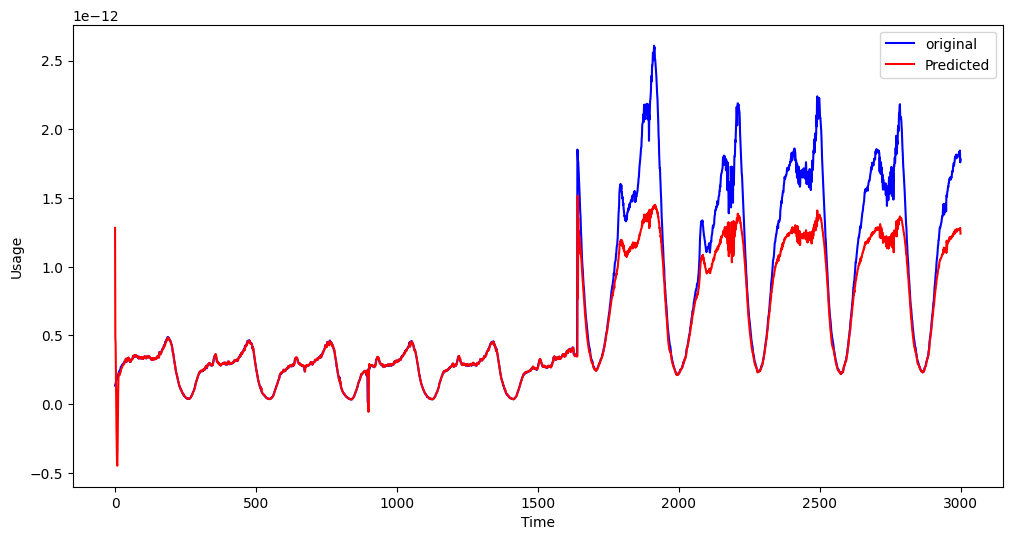

In [240]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b',label='original')
plt.plot(y_predicted, 'r',label='Predicted')
plt.xlabel('Time')
plt.ylabel('Usage')
plt.legend()


In [237]:
df = df[['采集时间', '出流量(M)']]
df['采集时间'] = pd.to_datetime(df['采集时间'])
df

KeyError: "None of [Index(['采集时间', '出流量(M)'], dtype='object')] are in the [index]"

In [ ]:
sns.lineplot(x=df['采集时间'], y=df['出流量(M)'])

In [ ]:
print("Start date is: ", df['采集时间'].min())
print("End date is: ", df['采集时间'].max())
df

In [ ]:
train = df.iloc[:8000]
test = df.iloc[8000:]

#train, test = df.loc[df['采集时间'] <= '2022-06-08 23:55:00'], df.loc[df['采集时间'] > '22022-06-08 23:55:00']

In [ ]:
#Convert pandas dataframe to numpy array
#dataset = dataframe.values
#dataset = dataset.astype('float32') #COnvert values to float

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
#scaler = MinMaxScaler() #Also try QuantileTransformer
scaler = StandardScaler()
scaler = scaler.fit(train[['出流量(M)']])

In [ ]:
train['出流量(M)'] = scaler.transform(train[['出流量(M)']])
test['出流量(M)'] = scaler.transform(test[['出流量(M)']])

In [ ]:
train['出流量(M)']

In [ ]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 2. We will make timesteps = 3. 
#With this, the resultant n_samples is 5 (as the input data has 9 rows).

seq_size = 30  # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.

In [ ]:
def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(len(x)-seq_size):
        #print(i)
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i+seq_size])
        
    return np.array(x_values), np.array(y_values)

trainX, trainY = to_sequences(train[['出流量(M)']], train['出流量(M)'], seq_size)
testX, testY = to_sequences(test[['出流量(M)']], test['出流量(M)'], seq_size)

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(rate=0.3))

model.add(RepeatVector(trainX.shape[1]))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(trainX.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

In [ ]:
# fit model
history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

In [ ]:
import tensorflow as tf
model.save('OneVariate.h5')

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('OneVariate.h5')

In [ ]:
#model.evaluate(testX, testY)

###########################
#Anomaly is where reconstruction error is large.
#We can define this value beyond which we call anomaly.
#Let us look at MAE in training prediction

trainPredict = new_model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)
plt.hist(trainMAE, bins=30)
max_trainMAE = 0.3 #or Define 90% value of max as threshold.

In [ ]:
testPredict =new_model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)
plt.hist(testMAE, bins=30)

In [ ]:
#Capture all details in a DataFrame for easy plotting
anomaly_df = pd.DataFrame(test[seq_size:])
anomaly_df['testMAE'] = testMAE
anomaly_df['max_trainMAE'] = max_trainMAE
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['max_trainMAE']
anomaly_df['出流量(M)'] = test[seq_size:]['出流量(M)']

    

In [ ]:
#Plot testMAE vs max_trainMAE
sns.lineplot(x=anomaly_df['采集时间'], y=anomaly_df['testMAE'])
sns.lineplot(x=anomaly_df['采集时间'], y=anomaly_df['max_trainMAE'])

anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]

In [ ]:

#Plot anomalies
sns.lineplot(x=anomaly_df['采集时间'], y=anomaly_df['出流量(M)'])
sns.scatterplot(x=anomalies['采集时间'], y=anomalies['出流量(M)'], color='r')